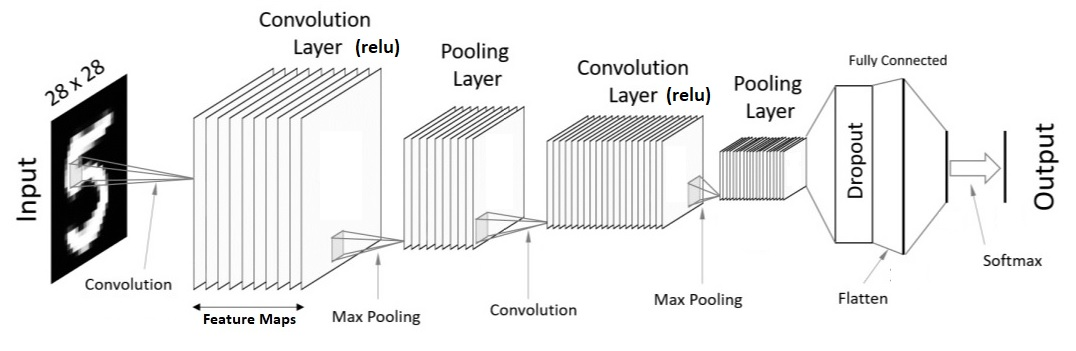

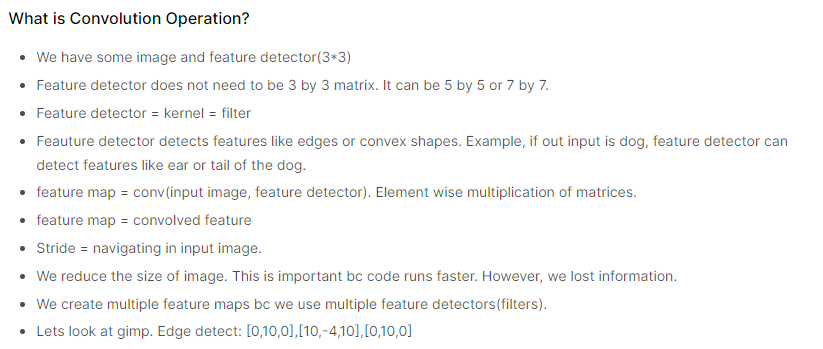

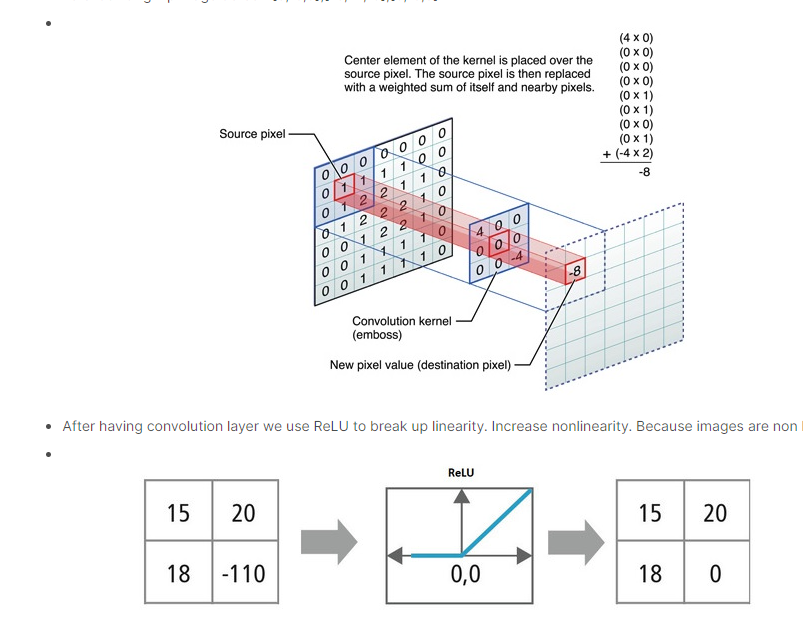

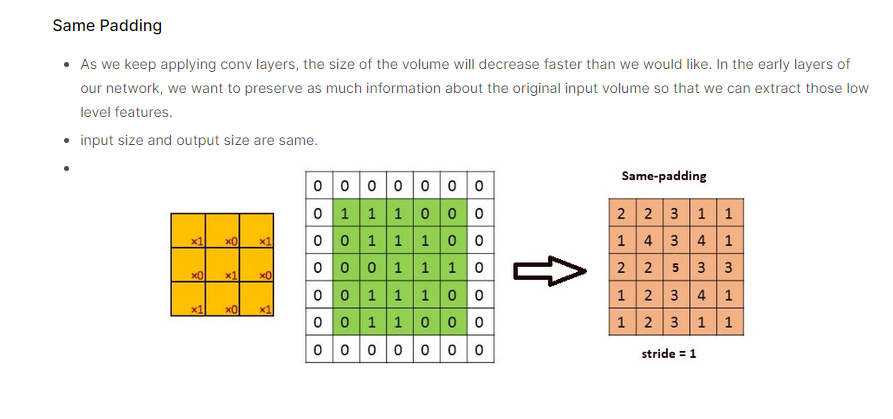

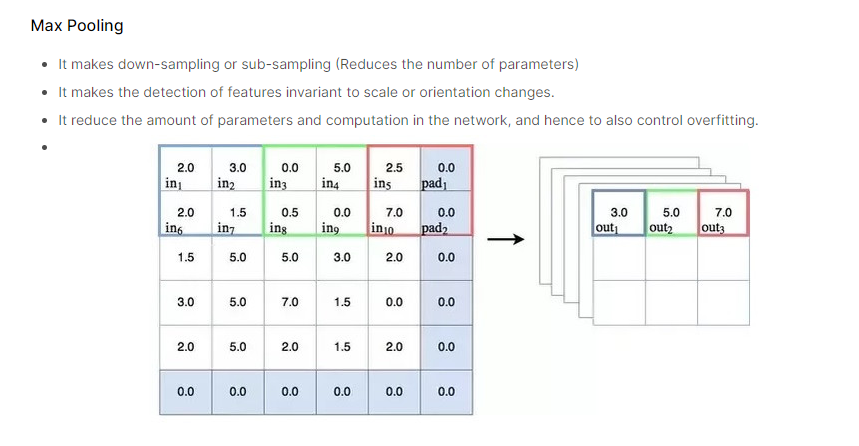

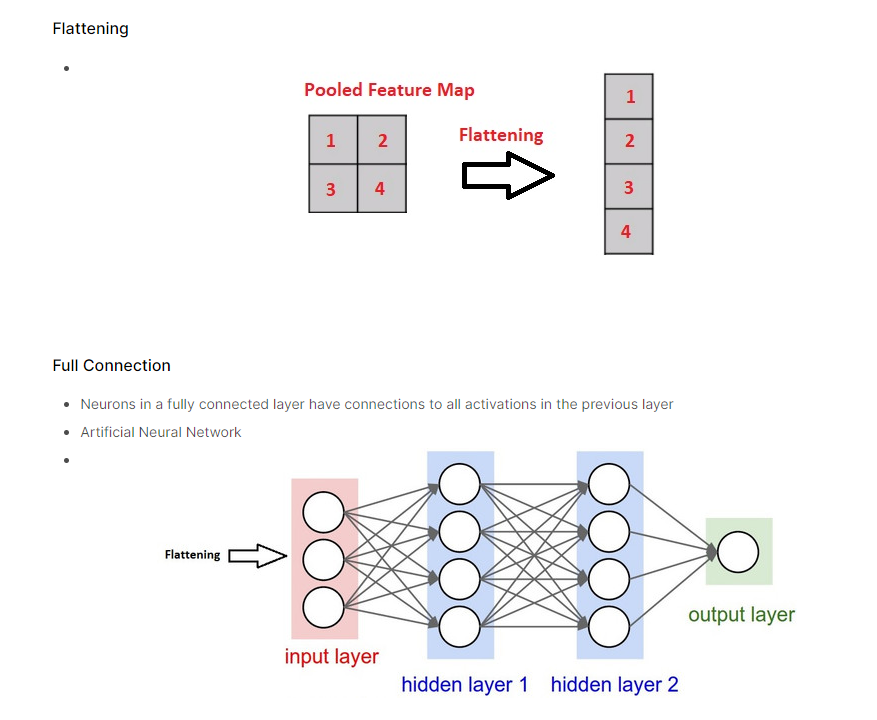

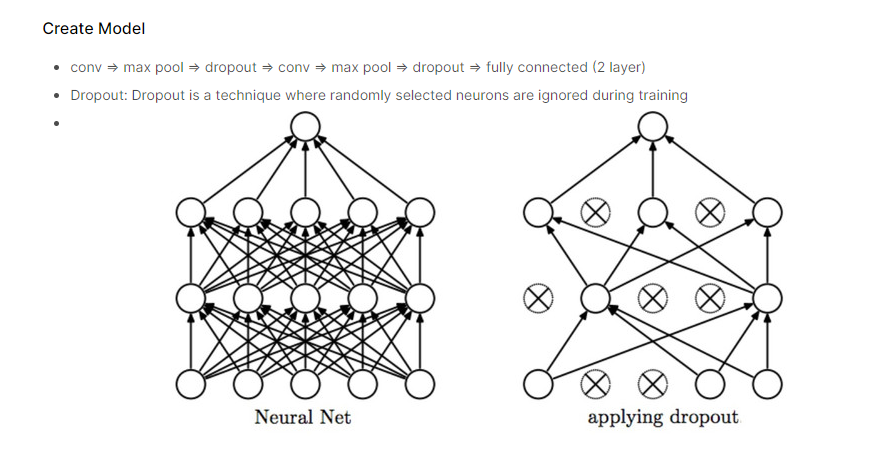

In [1]:
import tensorflow as tf
import keras
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

print("Tensorflow version is: " + tf.__version__)
print("Keras version is: " + keras.__version__)

Default GPU Device: /device:GPU:0
Tensorflow version is: 2.6.0
Keras version is: 2.4.3


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import numpy as np                   
import matplotlib.pyplot as plt      
import random                        



from keras.datasets import mnist     
from keras.models import Sequential  

from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils                         



from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization

from keras import backend as K

In [4]:
from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
import tensorflow as tf 
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    plt.show()

In [5]:

num_classes = 10


# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
model = Sequential()                                 

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) 
model.add(BatchNormalization(axis=-1))               
model.add(Activation('relu'))                     


# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        
model.add(BatchNormalization(axis=-1))               
model.add(Activation('relu'))                        
model.add(MaxPooling2D(pool_size=(2,2)))          


# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         
model.add(BatchNormalization(axis=-1))               
model.add(Activation('relu'))                     


# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        
model.add(BatchNormalization(axis=-1))               
model.add(Activation('relu'))                        
model.add(MaxPooling2D(pool_size=(2,2)))           

model.add(Flatten())                                 

# Fully Connected Layer 5
model.add(Dense(512))                                
model.add(BatchNormalization())                      
model.add(Activation('relu'))                        

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              
model.add(Dense(10))                                 
model.add(Activation('softmax'))    

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [9]:
train_generator = gen.flow(x_train, y_train, batch_size=128)
test_generator = test_gen.flow(x_test, y_test, batch_size=128)

In [10]:
history = model.fit(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

score = np.round(model.evaluate(x_test, y_test, verbose=0), decimals=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
468/468 [==============================] - 16s 26ms/step - loss: 0.1360 - accuracy: 0.9579 - val_loss: 0.0654 - val_accuracy: 0.9836
Epoch 2/5
468/468 [==============================] - 11s 24ms/step - loss: 0.0515 - accuracy: 0.9842 - val_loss: 0.0252 - val_accuracy: 0.9919
Epoch 3/5
468/468 [==============================] - 12s 25ms/step - loss: 0.0399 - accuracy: 0.9871 - val_loss: 0.0282 - val_accuracy: 0.9906
Epoch 4/5
468/468 [==============================] - 12s 25ms/step - loss: 0.0343 - accuracy: 0.9891 - val_loss: 0.0252 - val_accuracy: 0.9918
Epoch 5/5
468/468 [==============================] - 12s 25ms/step - loss: 0.0299 - accuracy: 0.9903 - val_loss: 0.0490 - val_accuracy: 0.9840
Test loss: 0.05
Test accuracy: 0.98


Test score: 0.04892906919121742
Test accuracy: 0.984000027179718


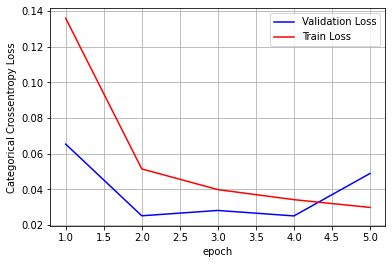

In [11]:
epochs = 5
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

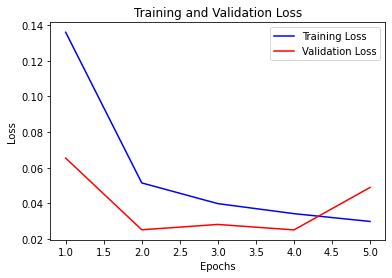

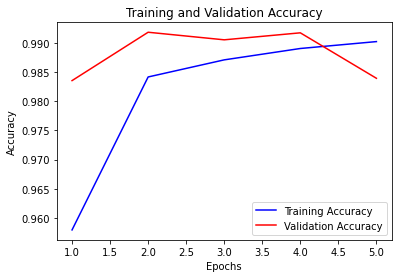

In [12]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('cnn_loss_plot.png')
plt.show()

plt.figure()

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('cnn_acc_plot.png')
plt.show()

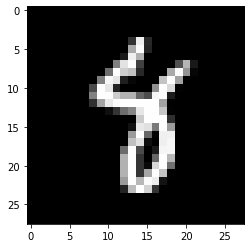

In [13]:
plt.imshow(x_train[160].reshape(28,28), cmap = 'gray')

In [20]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

#https://gist.github.com/NISH1001/7287b01aaa531aec08ab21359f7d3342 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*4.5,col_size*3.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [21]:
image_index_to_vizualize = 160

In [22]:
activations = activation_model.predict(x_train[image_index_to_vizualize].reshape(1,28,28,1))

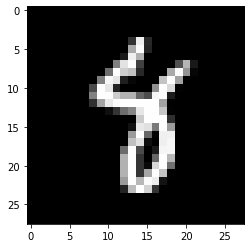

In [23]:
plt.imshow(x_train[image_index_to_vizualize].reshape(28,28), cmap = 'gray')

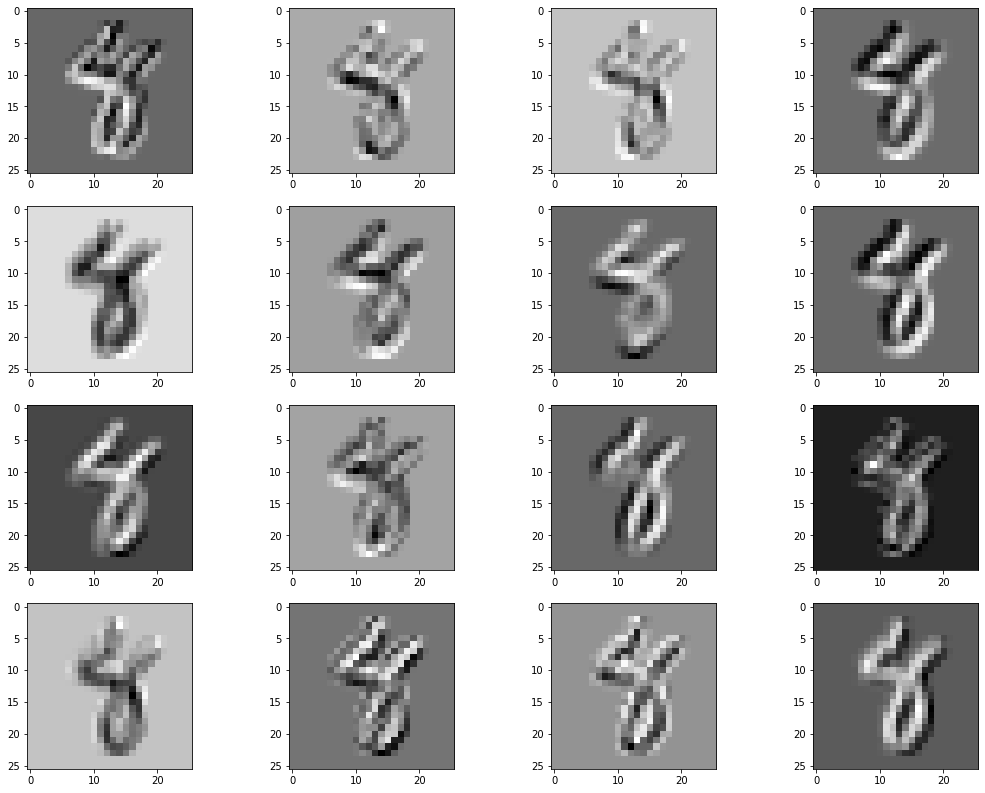

In [24]:
display_activation(activations, 4,4,0)

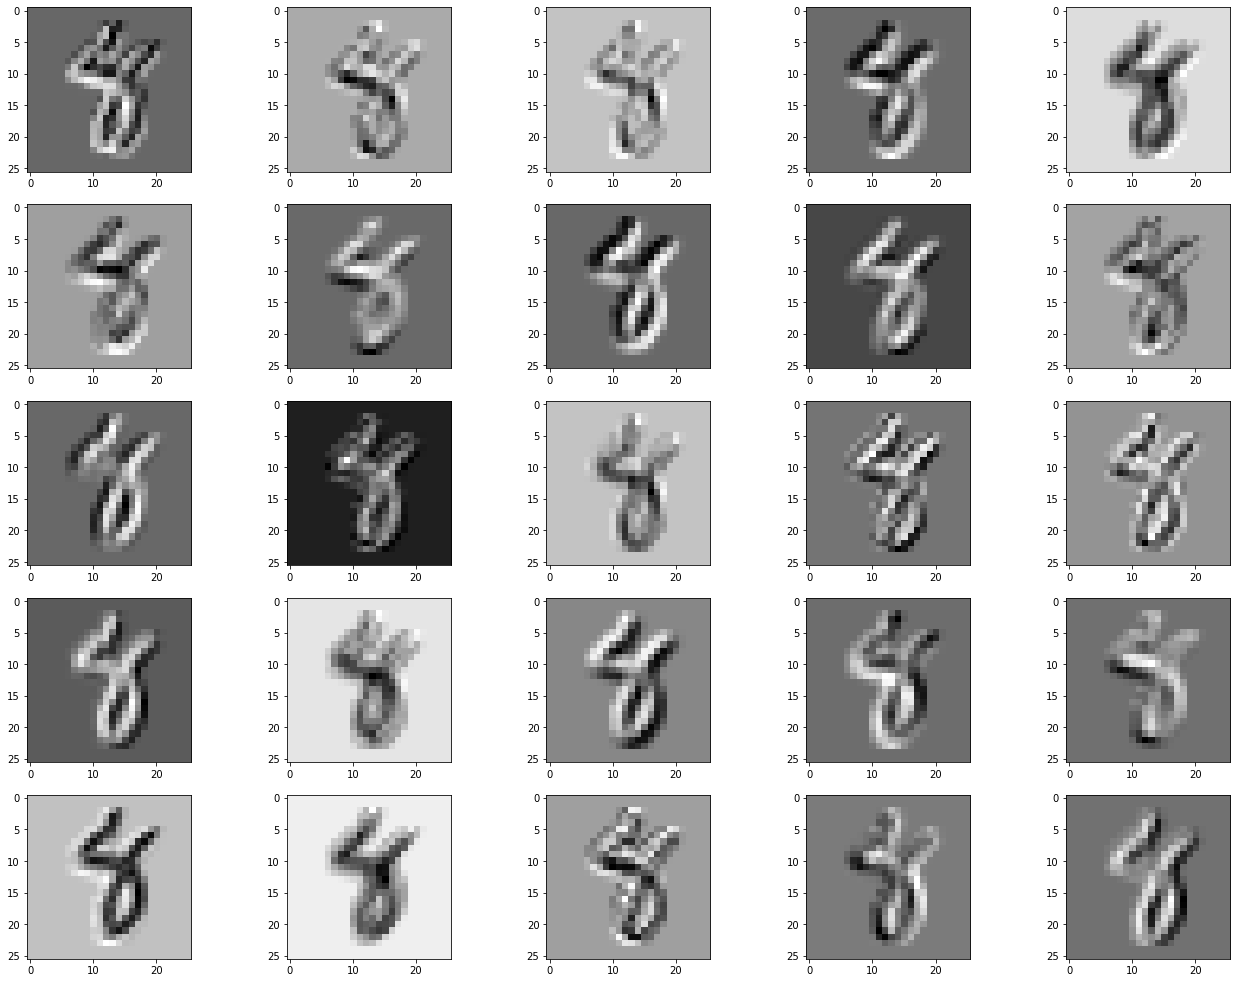

In [25]:
display_activation(activations, 5,5,1)

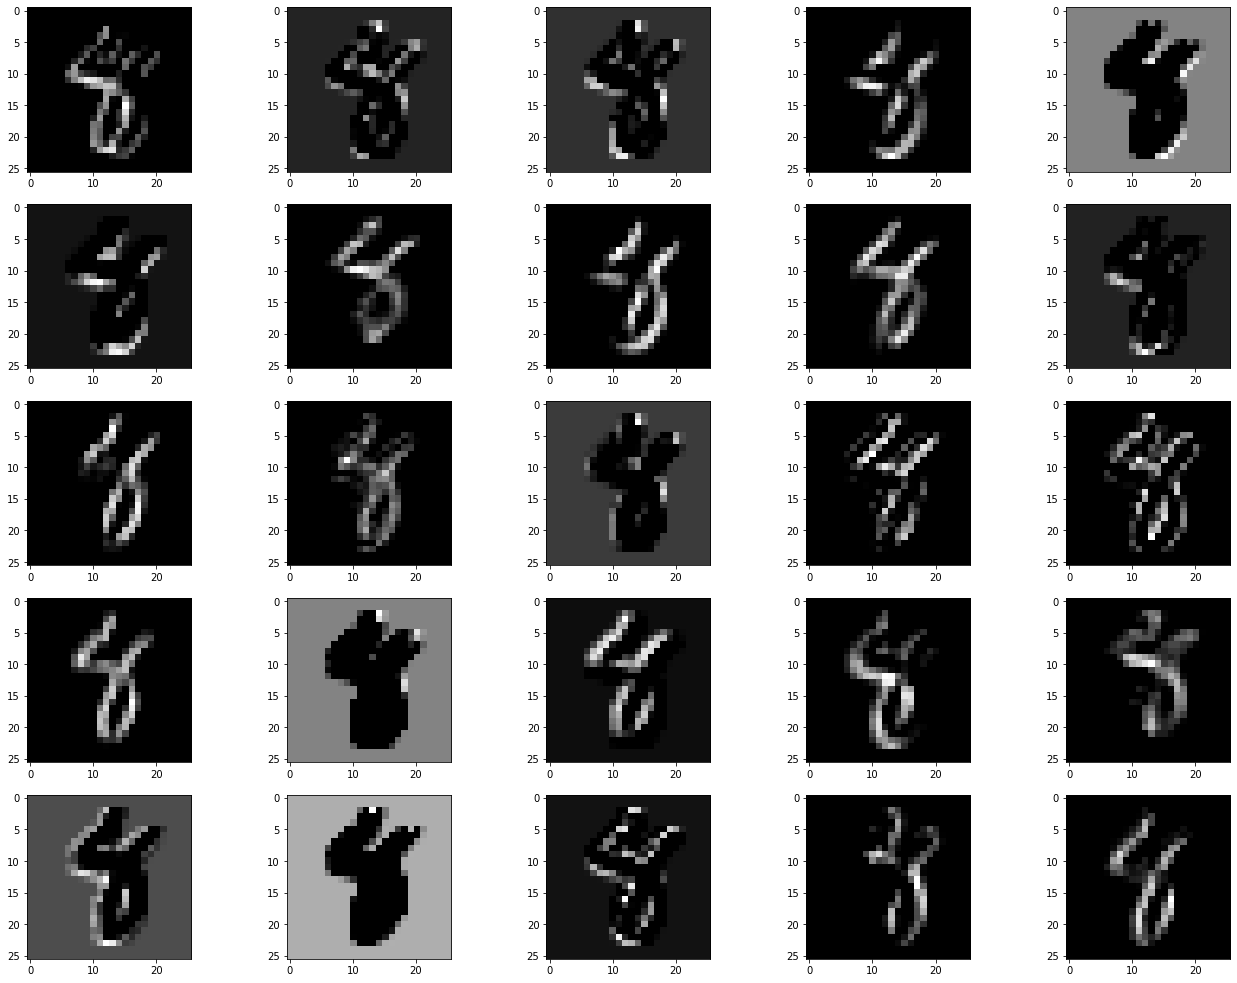

In [26]:
display_activation(activations, 5,5,2)

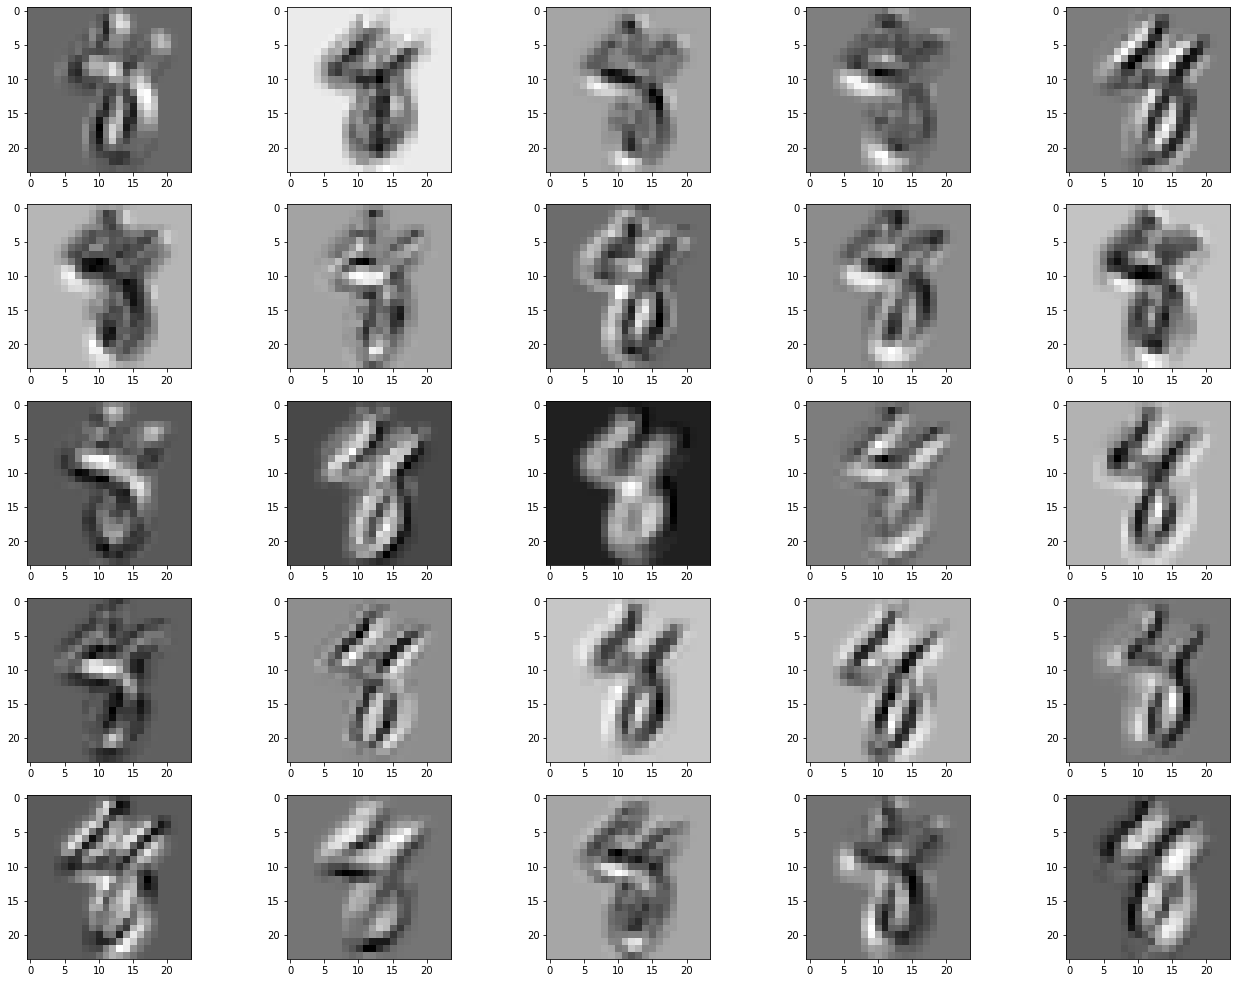

In [27]:
display_activation(activations, 5,5,3)

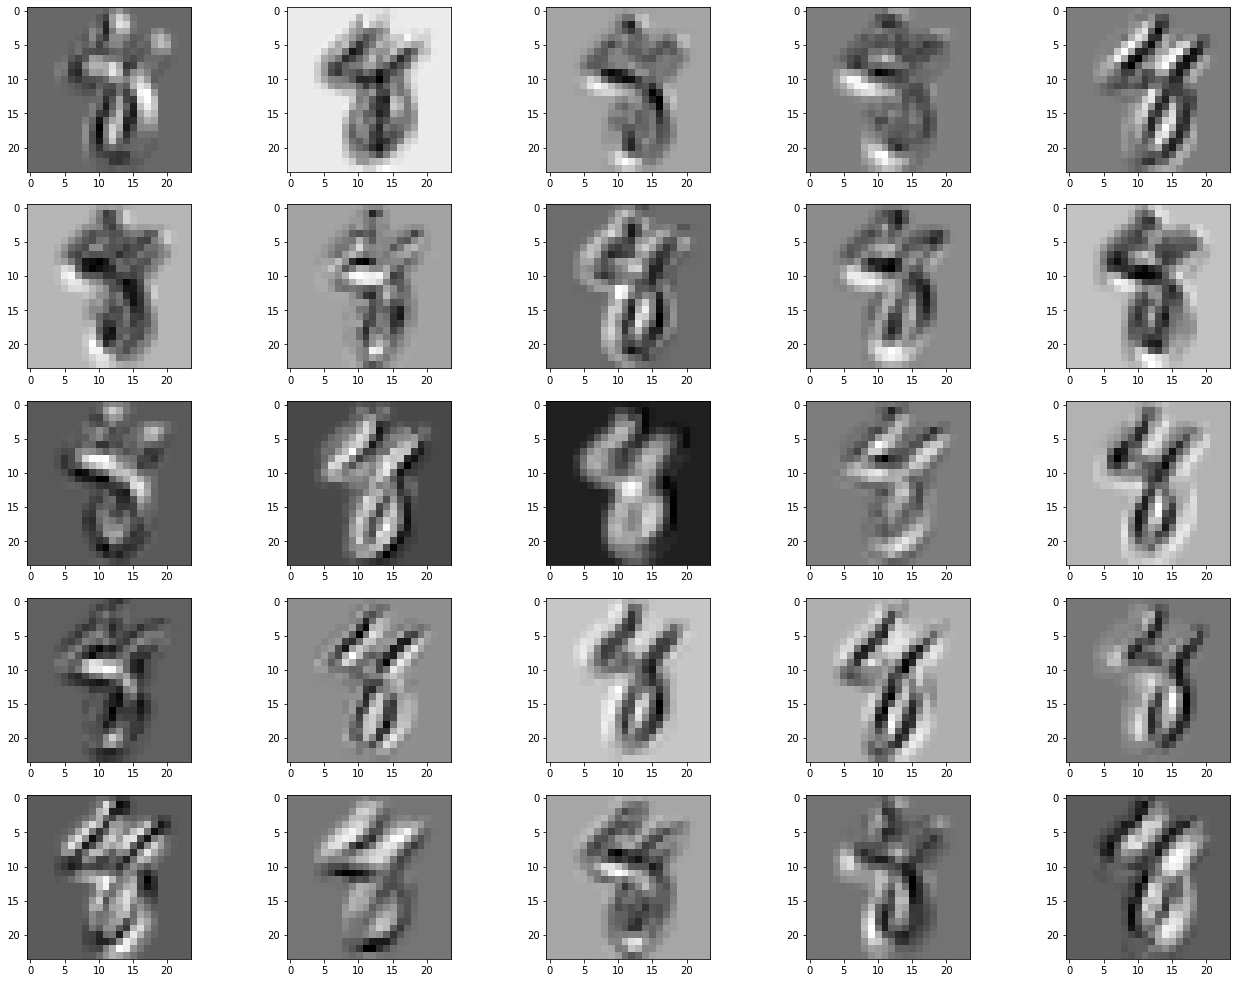

In [28]:
display_activation(activations, 5,5,4)

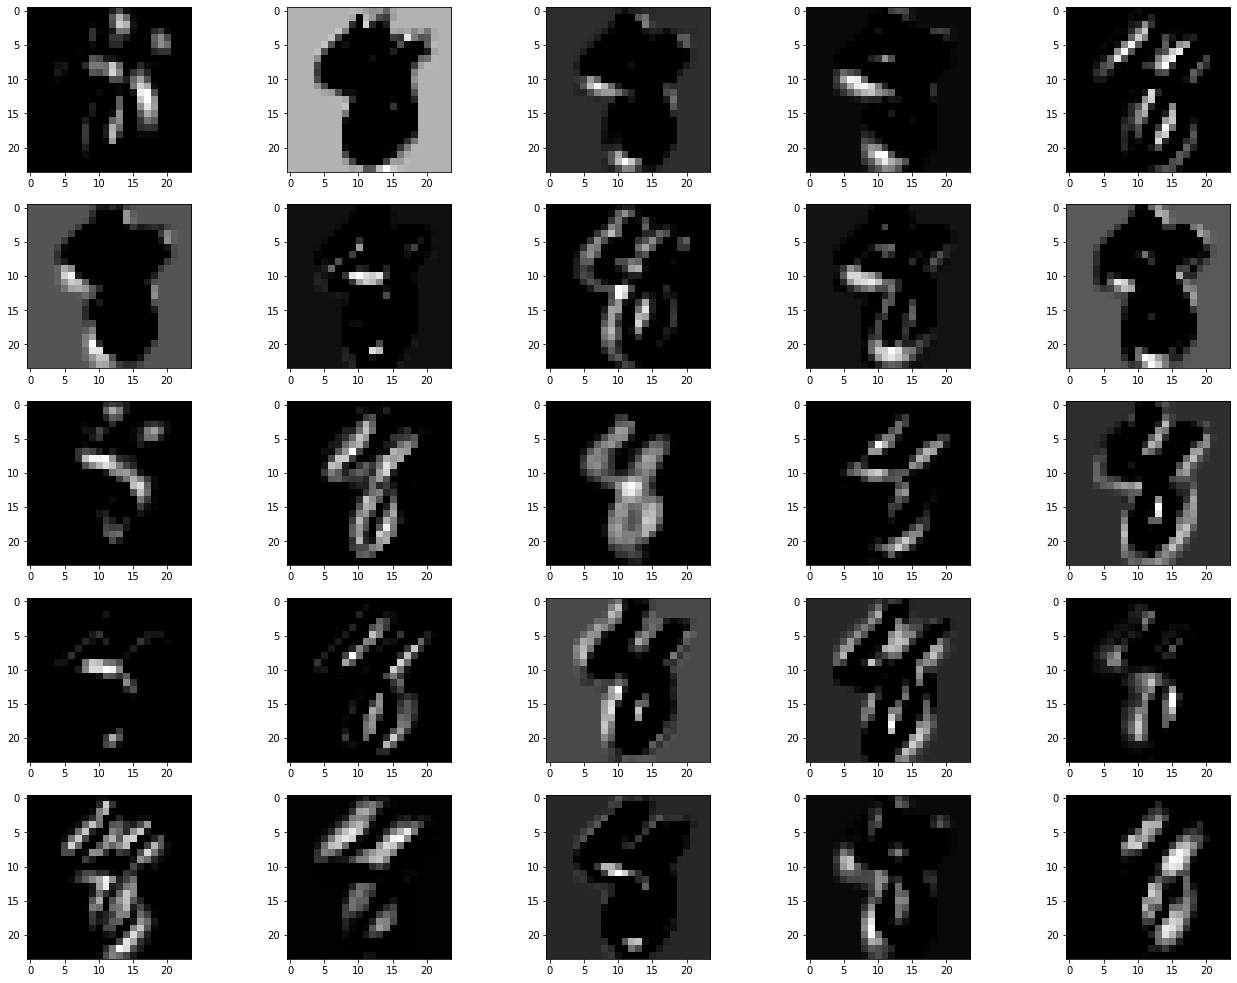

In [29]:
display_activation(activations, 5,5,5)

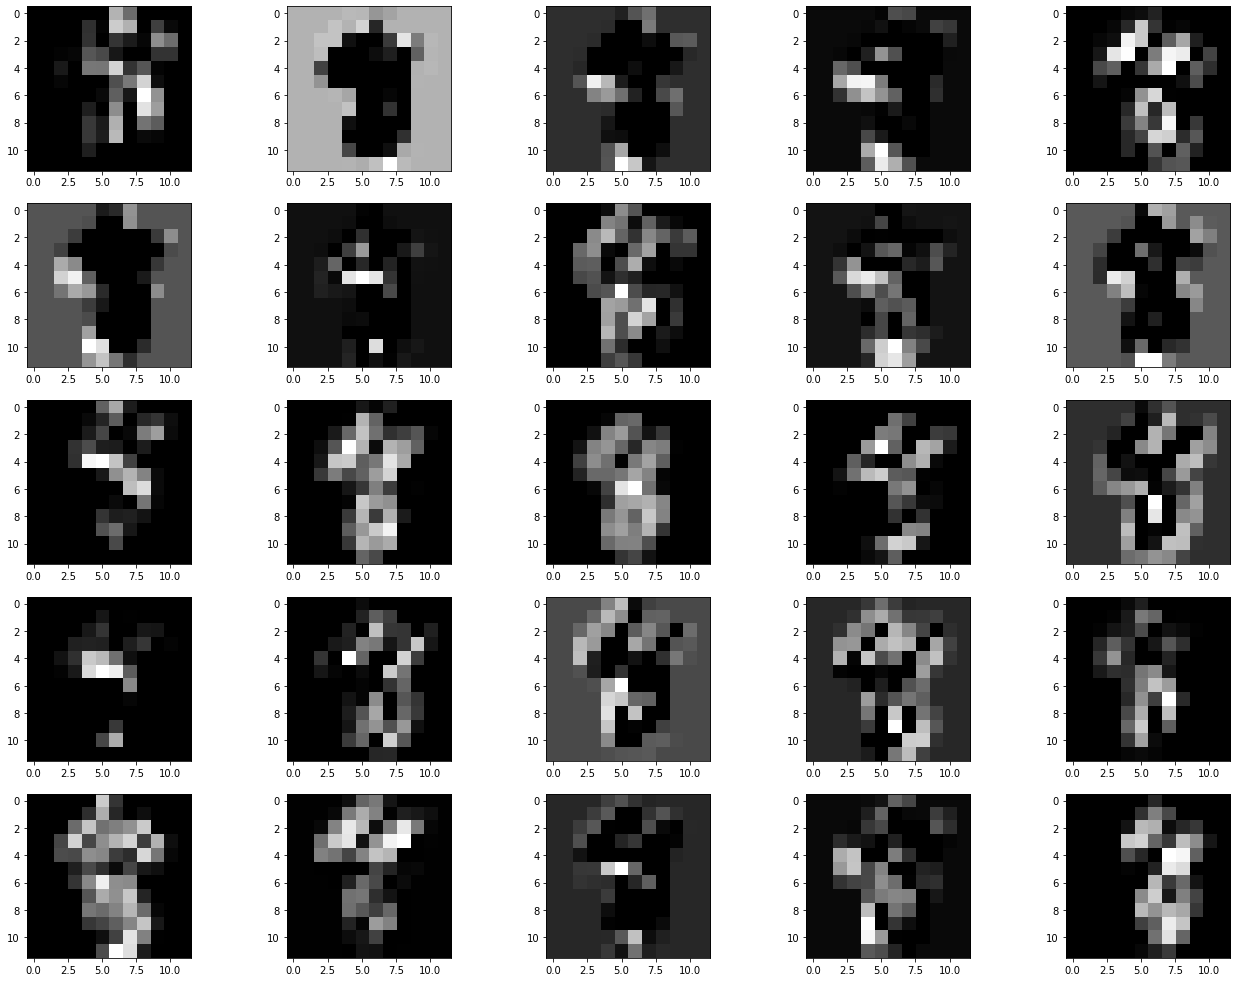

In [30]:
display_activation(activations, 5,5,6)

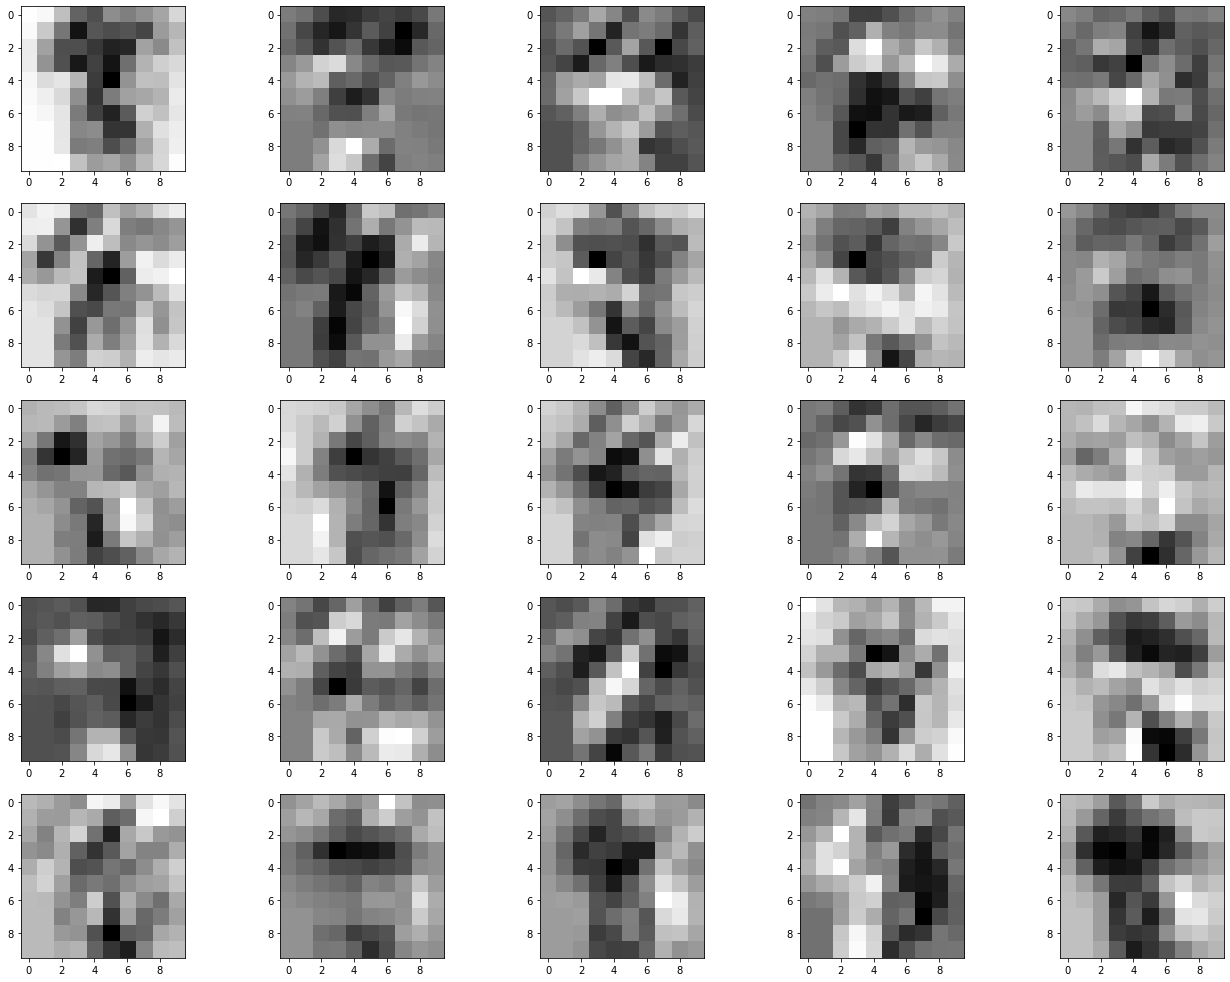

In [31]:
display_activation(activations, 5,5,7)

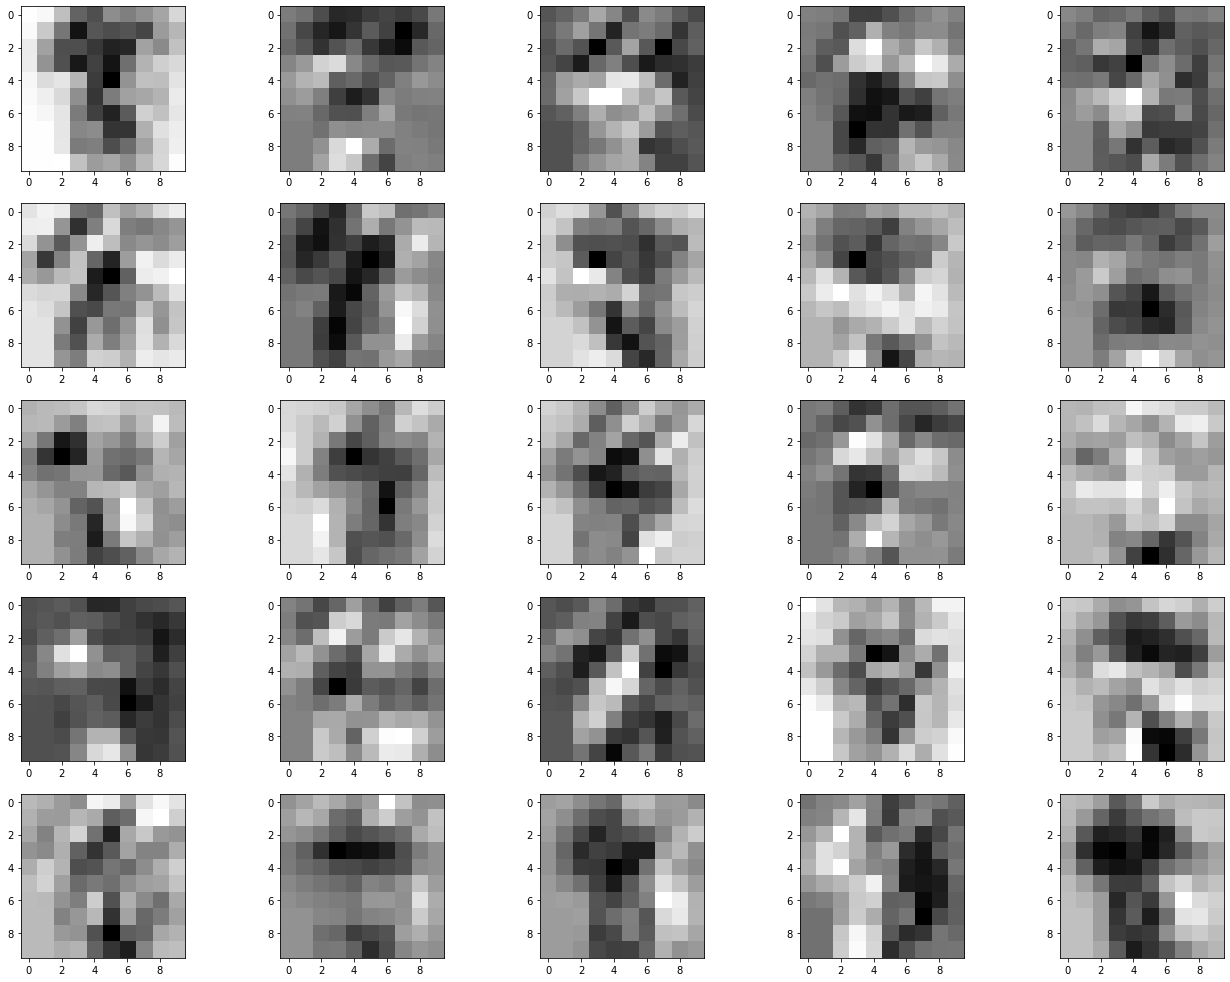

In [32]:
display_activation(activations, 5,5,8)

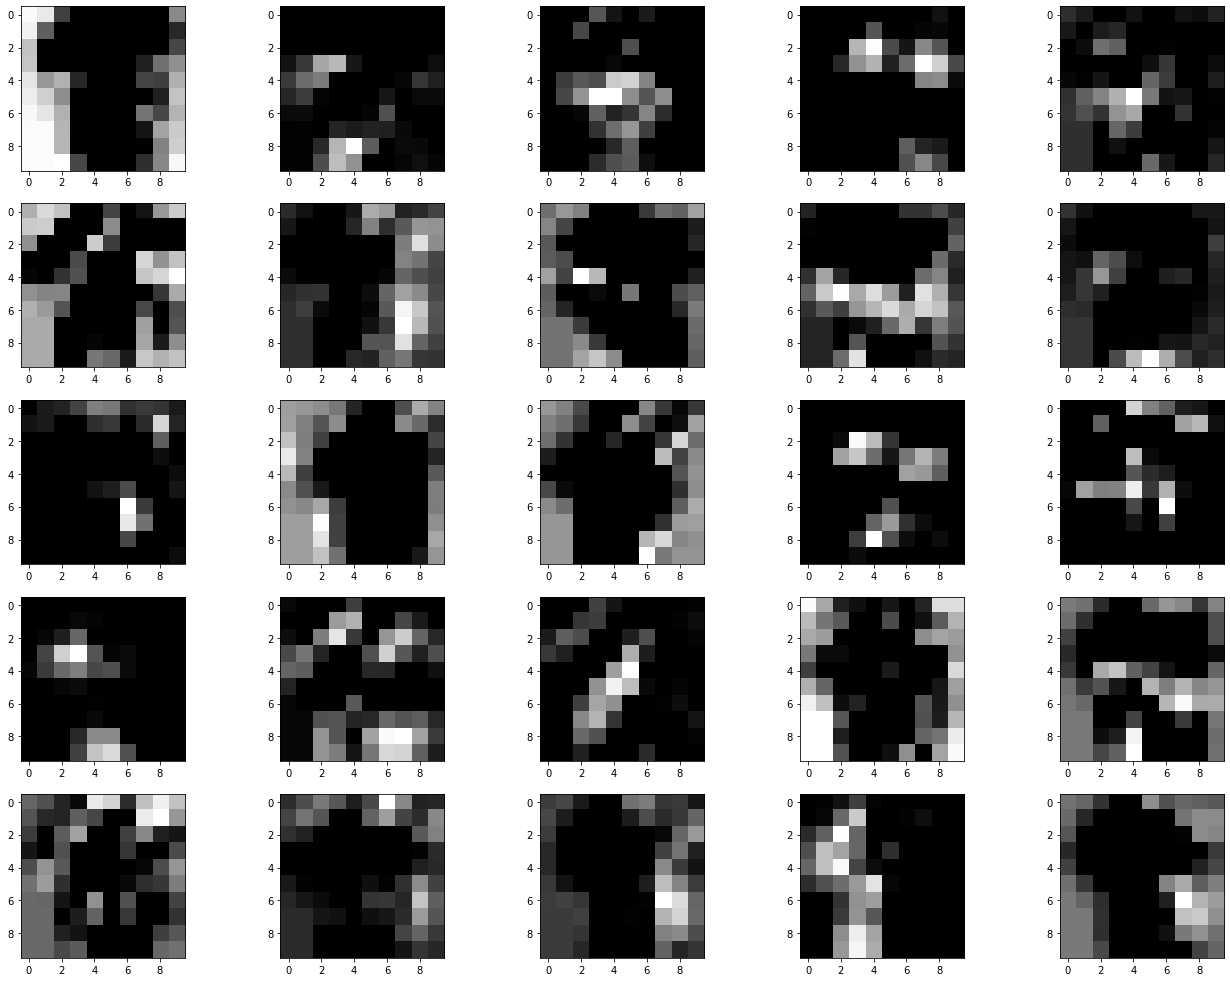

In [33]:
display_activation(activations, 5,5,9)

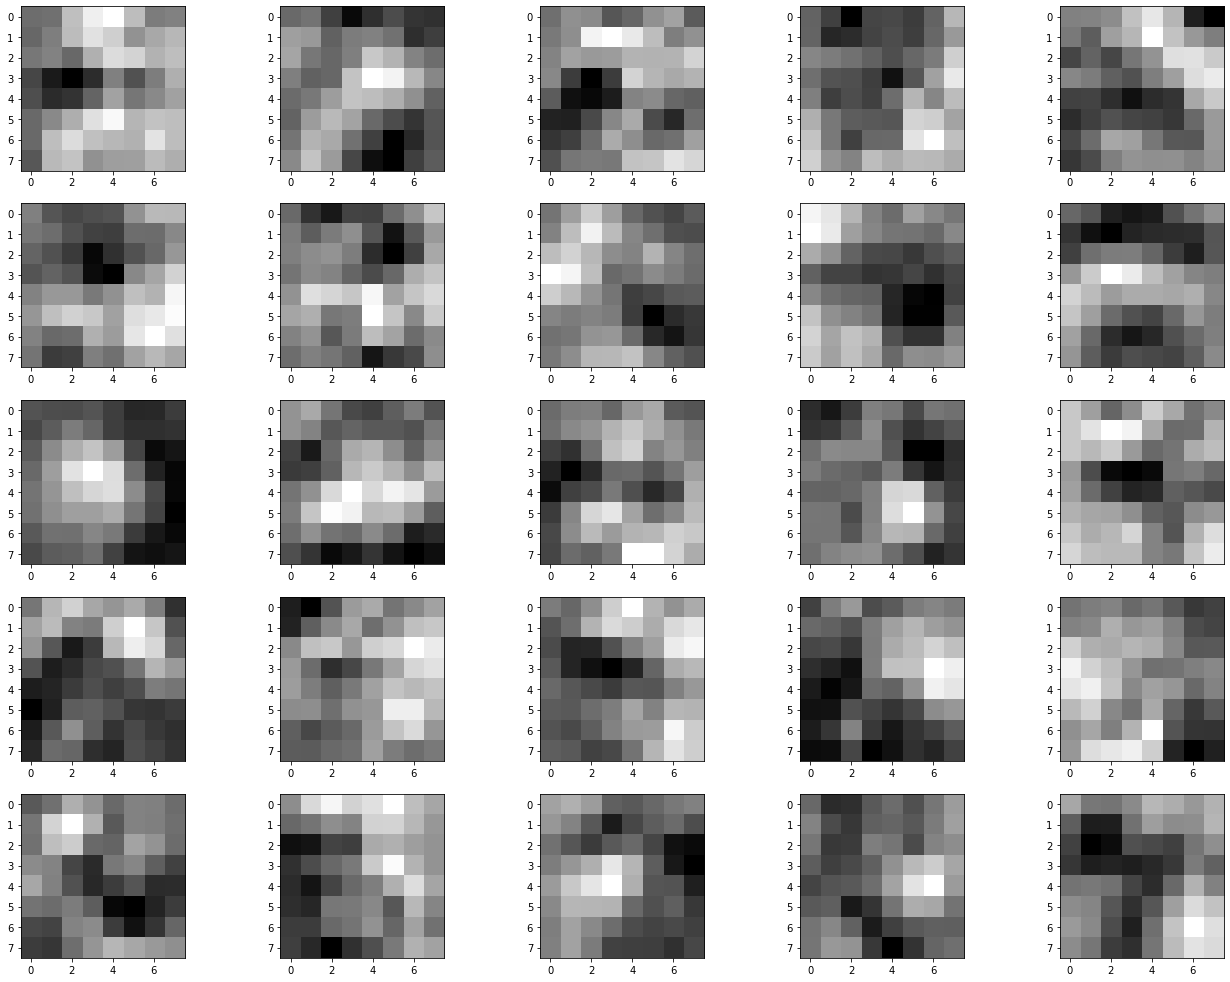

In [34]:
display_activation(activations, 5,5,10)

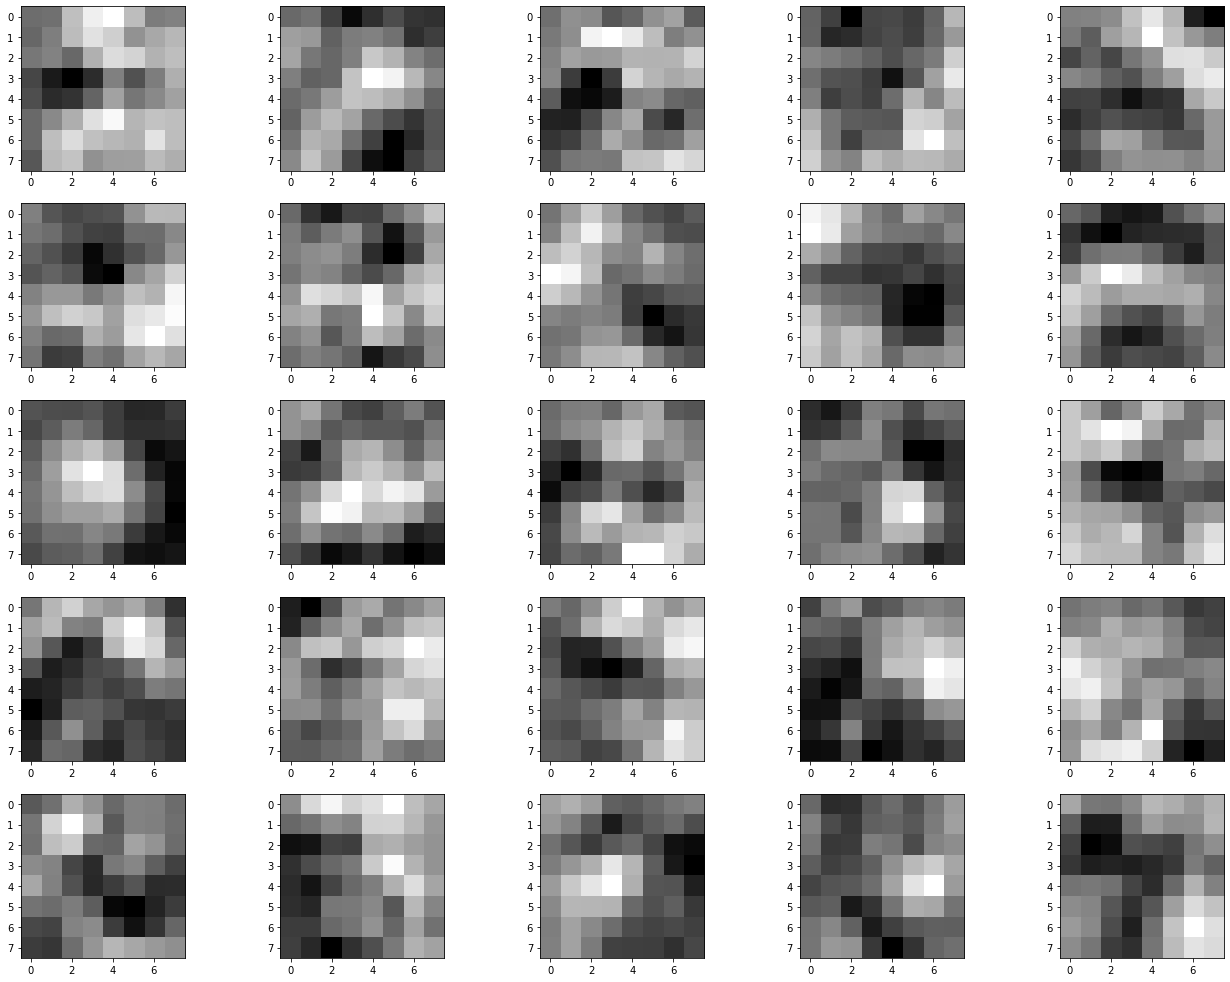

In [35]:
display_activation(activations, 5,5,11)

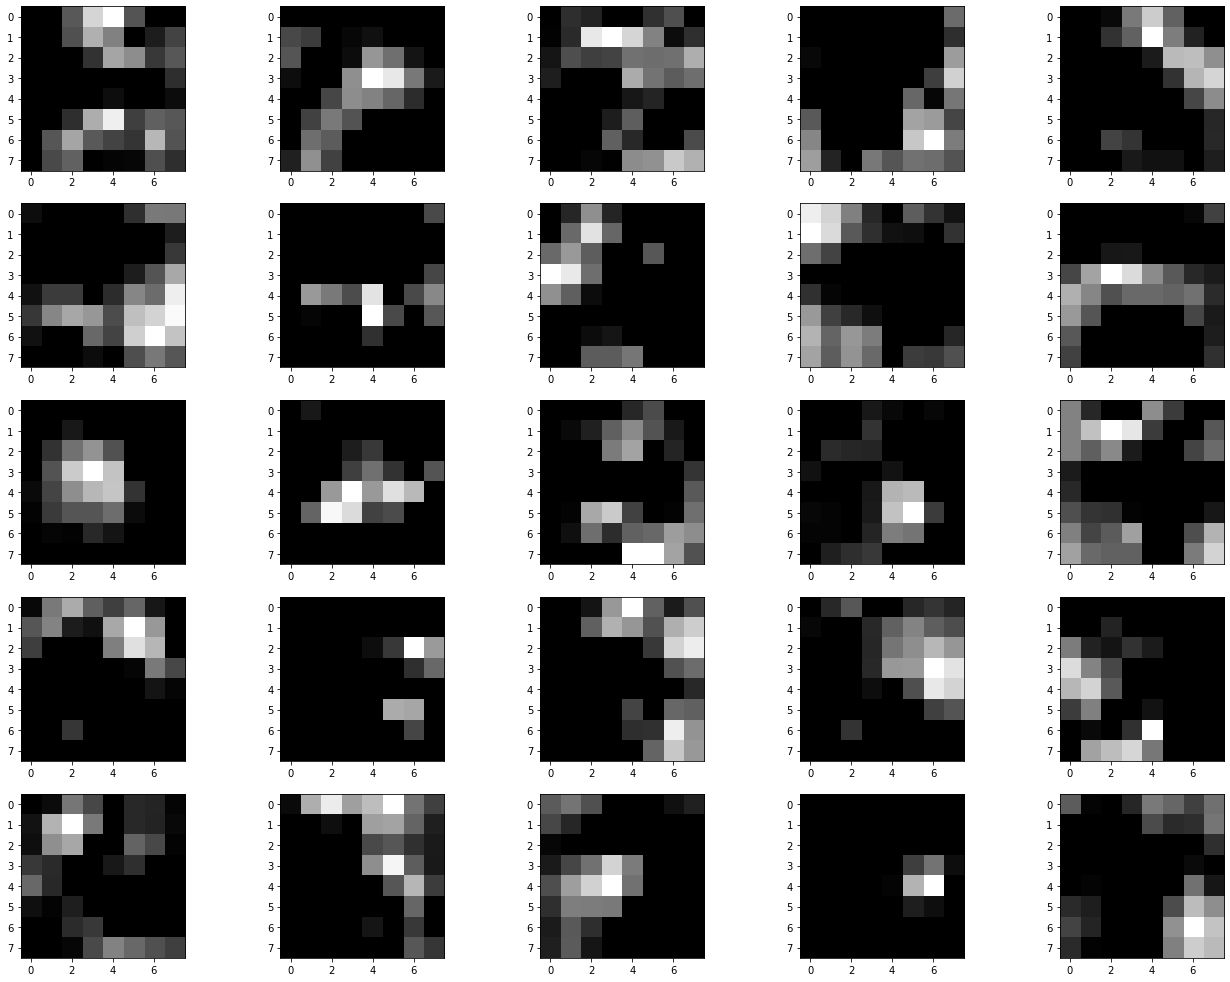

In [36]:
display_activation(activations, 5,5,12)

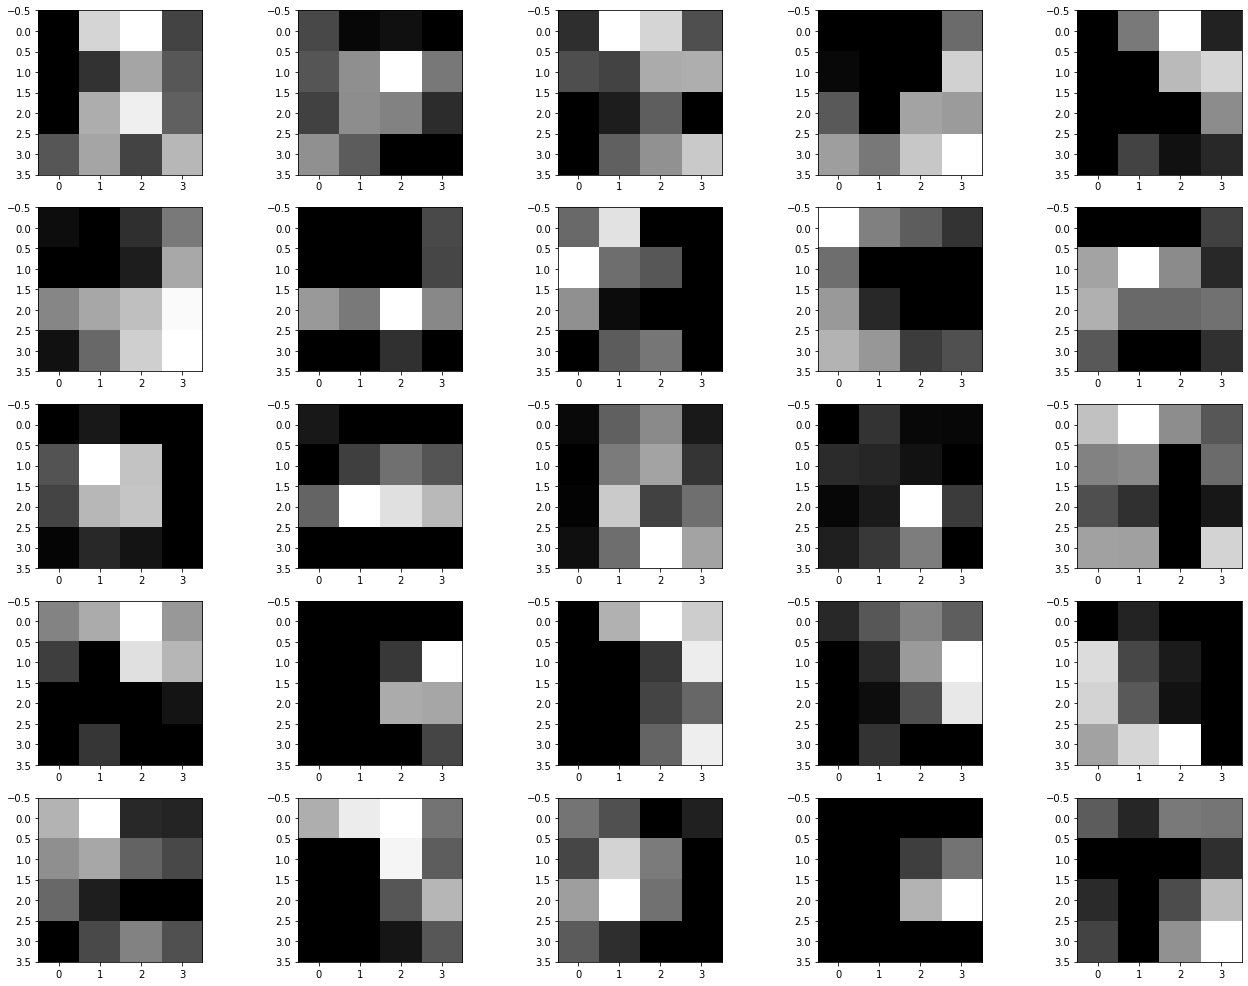

In [37]:
display_activation(activations, 5,5,13)

In [38]:
for layer in model.layers:
    if 'conv' in layer.name:
        filters, bias= layer.get_weights()
        print(layer.name, filters.shape)

conv2d (3, 3, 1, 32)
conv2d_1 (3, 3, 32, 32)
conv2d_2 (3, 3, 32, 64)
conv2d_3 (3, 3, 64, 64)


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0

In [40]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs = [layer_outputs[0], layer_outputs[4]]
layer_outputs

[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 24, 24, 32) dtype=float32 (created by layer 'batch_normalization_1')>]

In [41]:
for layer in model.layers:
    if'conv' in layer.name:
        filters, biases = layer.get_weights()
        
        print('Layer: ', layer.name, filters.shape)
        
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)
        
        print('Filter size: (', filters.shape[0], ',', filters.shape[1], ')')
        print('Channels in this layer: ', filters.shape[2])
        print('Number of filters: ', filters.shape[3])

Layer:  conv2d (3, 3, 1, 32)
Filter size: ( 3 , 3 )
Channels in this layer:  1
Number of filters:  32
Layer:  conv2d_1 (3, 3, 32, 32)
Filter size: ( 3 , 3 )
Channels in this layer:  32
Number of filters:  32
Layer:  conv2d_2 (3, 3, 32, 64)
Filter size: ( 3 , 3 )
Channels in this layer:  32
Number of filters:  64
Layer:  conv2d_3 (3, 3, 64, 64)
Filter size: ( 3 , 3 )
Channels in this layer:  64
Number of filters:  64


Layer:  conv2d (3, 3, 1, 32)
Filter size: ( 3 , 3 )
Channels in this layer:  1
Number of filters:  32


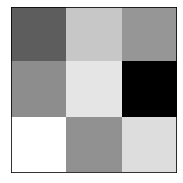

Layer:  conv2d_1 (3, 3, 32, 32)
Filter size: ( 3 , 3 )
Channels in this layer:  32
Number of filters:  32


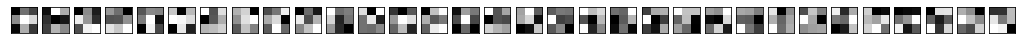

Layer:  conv2d_2 (3, 3, 32, 64)
Filter size: ( 3 , 3 )
Channels in this layer:  32
Number of filters:  64


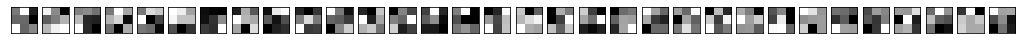

Layer:  conv2d_3 (3, 3, 64, 64)
Filter size: ( 3 , 3 )
Channels in this layer:  64
Number of filters:  64


In [51]:
for layer in model.layers:
    if'conv' in layer.name:
        filters, biases = layer.get_weights()
        
        print('Layer: ', layer.name, filters.shape)
        
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)
        
        print('Filter size: (', filters.shape[0], ',', filters.shape[1], ')')
        print('Channels in this layer: ', filters.shape[2])
        print('Number of filters: ', filters.shape[3])
        
        count = 1
        plt.figure(figsize = (18, 14))
        
        # Plotting the first channel of every filter
        for i in range(filters.shape[2]):
            
            ax= plt.subplot(4, filters.shape[2], count)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(filters[:,:,0, i], cmap=plt.cm.binary)
            count+=1
            
        plt.show()

conv2d


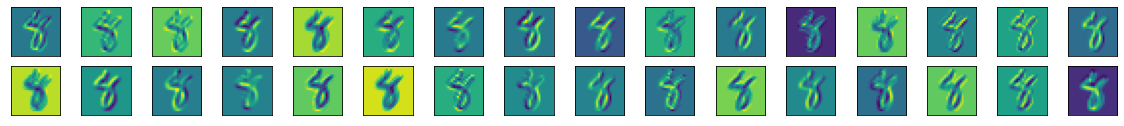

batch_normalization


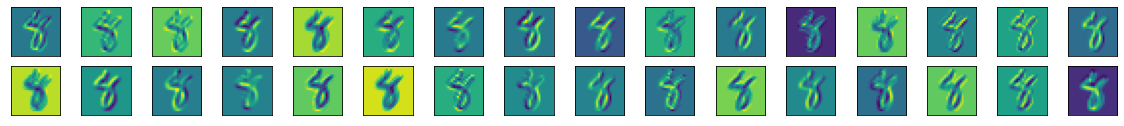

activation


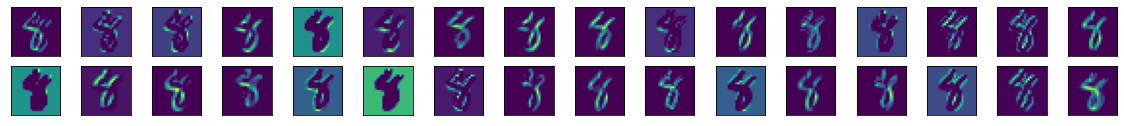

conv2d_1


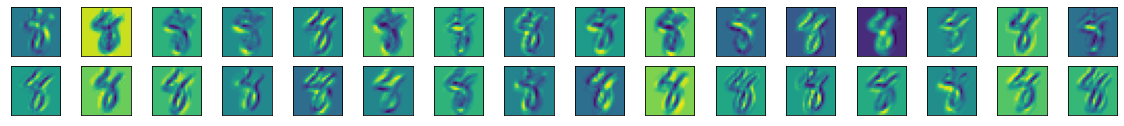

batch_normalization_1


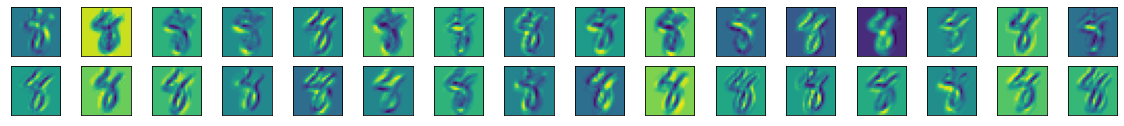

activation_1


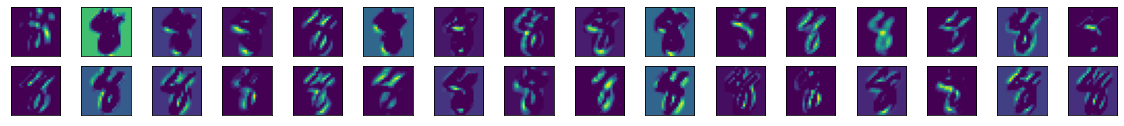

max_pooling2d


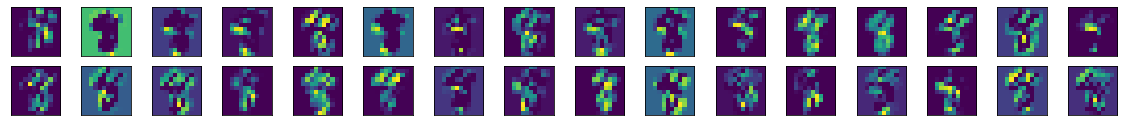

conv2d_2


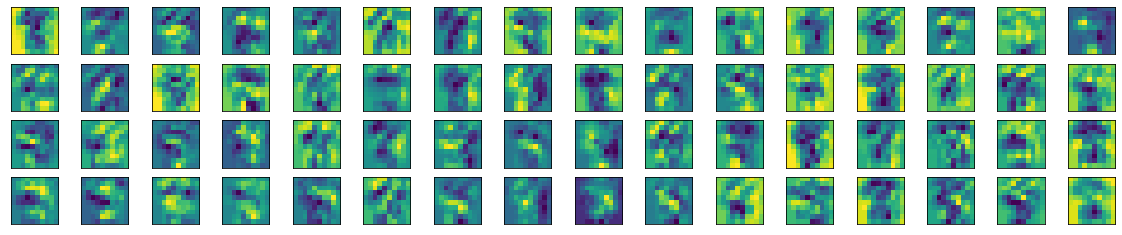

batch_normalization_2


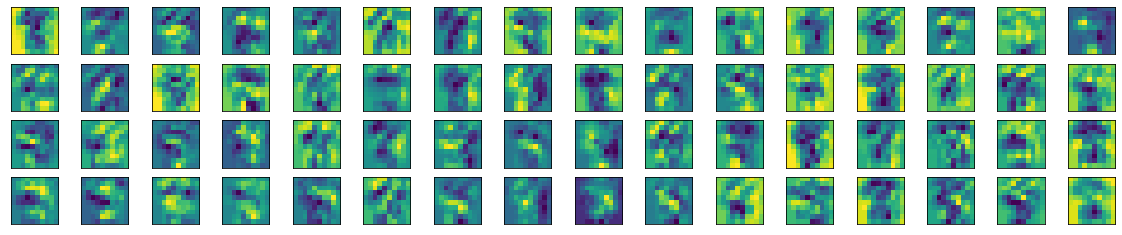

activation_2


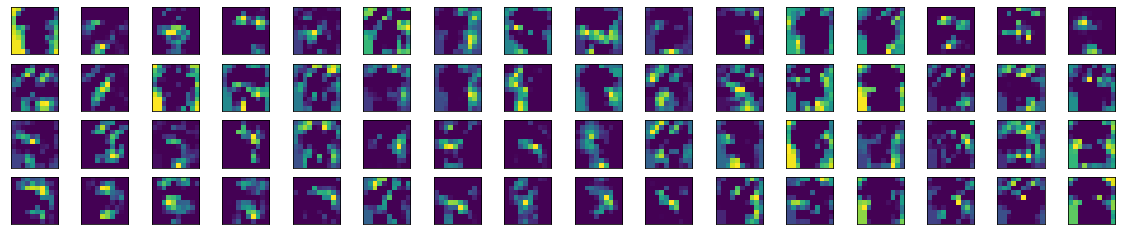

conv2d_3


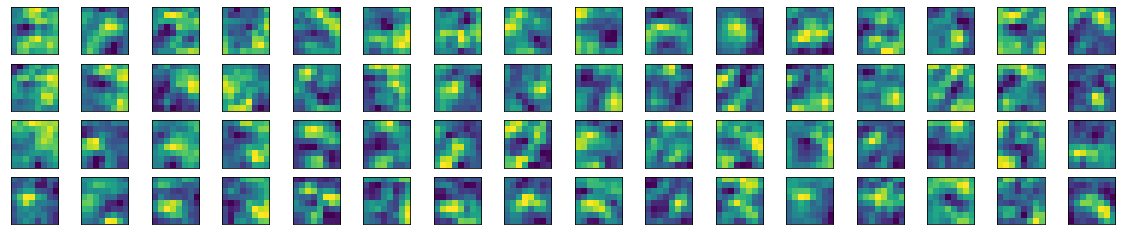

batch_normalization_3


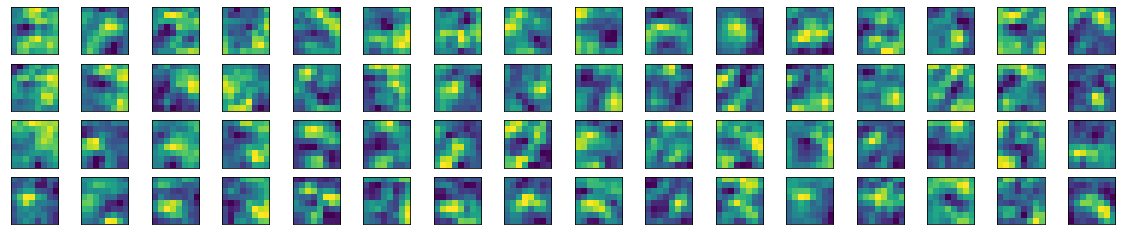

activation_3


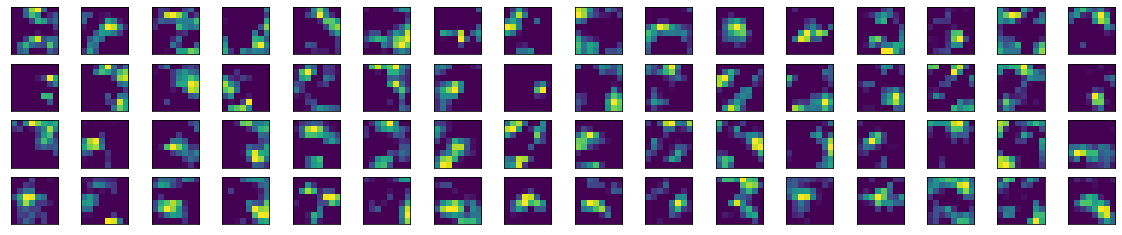

max_pooling2d_1


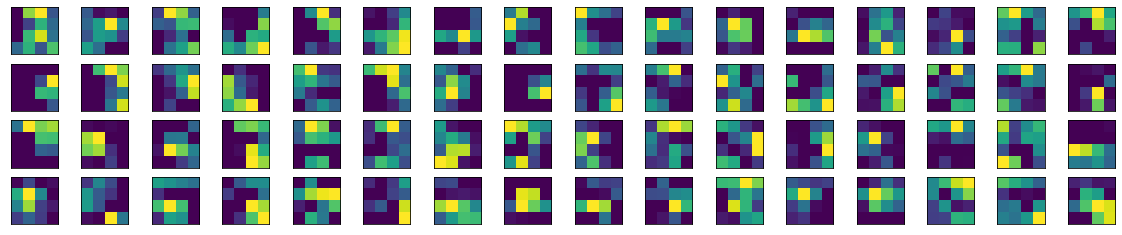

In [19]:
layer_names = []
for layer in model.layers[:14]:
    layer_names.append(layer.name)

for activation_layer, layer_name in zip(activations, layer_names):

    n_features = activation_layer.shape[3]
    feat_per_row = 16
    rows = n_features//feat_per_row
    size = activation_layer.shape[1]
    
    print(layer_name)
    plt.figure(figsize=(20, rows))
    for i in range(n_features):
        ax = plt.subplot(rows, feat_per_row, i+1)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(activation_layer[:,:,:,i].reshape(size, size))#, cmap = plt.cm.binary)
    
    plt.show()

<h2> References</h2>
https://www.kaggle.com/prateekarma/visualizing-different-layers-of-a-cnn<br>
https://www.kaggle.com/kanncaa1/convolutional-neural-network-cnn-tutorial<br>
https://www.kaggle.com/mani97/cnn-99-57-visualise-filters-activation-layers<br>